In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cd Desktop\nieruchomosci\

C:\Users\adria\Desktop\nieruchomosci


In [54]:
gdansk = 'gdansk/gdansk.json'
krakow = 'krakow/krakow.json'
kujawskopomorskie = 'kujawskopomorskie/kujawskopomorskie.json'
lodzkie = 'lodzkie/lodzkie.json'
multi = 'multi/multi.json'
multi1 = 'multi1/multi1.json'
poznan = 'poznan/poznan.json'
slaskie = 'slaskie/slaskie.json'
warszawa = 'warszawa/warszawa.json'
wroclaw = 'wroclaw/wroclaw.json'
zachodniopomorskie = 'zachodniopomorskie/zachodniopomorskie.json'


gdn = pd.read_json(gdansk,lines=True)
krk = pd.read_json(krakow,lines=True)
kup = pd.read_json(kujawskopomorskie,lines=True)
ldz = pd.read_json(lodzkie,lines=True)
mu0 = pd.read_json(multi,lines=True)
mu1 = pd.read_json(multi1,lines=True)
pzn = pd.read_json(poznan,lines=True)
slk = pd.read_json(slaskie,lines=True)
waw = pd.read_json(warszawa,lines=True)
wro = pd.read_json(wroclaw,lines=True)
zap = pd.read_json(zachodniopomorskie,lines=True)

df = pd.concat([gdn,krk,kup,ldz,mu0,mu1,pzn,slk,waw,wro,zap], ignore_index=True)

df.head(2)

,_id,numer_oferty,kiedy_dodano,kiedy_aktualizowano,typ_oferty,lokalizacja,cena,liczba_pokoi,pietro,ogrzewanie,rodzaj_zabudowy,material_budynku,stan_wykonczenia,powierzchnia,link_ogloszenia,okna,dostepne_od
0,{'$oid': '5ebd2641940ddfb6b1597da9'},60446263,Data dodania: 14 dni temu,Data aktualizacji: dzień temu,Oferta biura nieruchomości,"Gdańsk, Osowa, Zatokowa",690 000 zł,5,1,gazowe,blok,cegła,do zamieszkania,84 m²,https://www.otodom.pl/oferta/5-pokoi-ogrod-piw...,NaN,NaN
1,{'$oid': '5ebd2642940ddfb6b1597daa'},60496312,Data dodania: za około 2 godziny,Data aktualizacji: za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Ujeścisko-Łostowice, Łostowice",380 000 zł,2,parter,NaN,blok,NaN,NaN,"45,20 m²",https://www.otodom.pl/oferta/wspaniale-mieszka...,NaN,NaN


In [55]:
import json 
id_oferty = []

for i in df['_id']:
    idf = json.dumps(i).split(" ")[1].strip('""}')
    id_oferty.append(idf)
    
df['id_oferty'] = id_oferty
df.drop('_id',axis=1,inplace=True)

df['kiedy_dodano'] = df['kiedy_dodano'].str.replace('Data dodania: ',"")
df['kiedy_aktualizowano'] = df['kiedy_aktualizowano'].str.replace('Data aktualizacji: ',"")
df.head()


,numer_oferty,kiedy_dodano,kiedy_aktualizowano,typ_oferty,lokalizacja,cena,liczba_pokoi,pietro,ogrzewanie,rodzaj_zabudowy,material_budynku,stan_wykonczenia,powierzchnia,link_ogloszenia,okna,dostepne_od,id_oferty
0,60446263,14 dni temu,dzień temu,Oferta biura nieruchomości,"Gdańsk, Osowa, Zatokowa",690 000 zł,5,1,gazowe,blok,cegła,do zamieszkania,84 m²,https://www.otodom.pl/oferta/5-pokoi-ogrod-piw...,NaN,NaN,5ebd2641940ddfb6b1597da9
1,60496312,za około 2 godziny,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Ujeścisko-Łostowice, Łostowice",380 000 zł,2,parter,NaN,blok,NaN,NaN,"45,20 m²",https://www.otodom.pl/oferta/wspaniale-mieszka...,NaN,NaN,5ebd2642940ddfb6b1597daa
2,60484644,3 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Orunia-Św. Wojciech-Lipce, Orunia, Dia...",259 000 zł,2,1,NaN,blok,cegła,do remontu,36 m²,https://www.otodom.pl/oferta/mieszkanie-36-m-g...,plastikowe,NaN,5ebd2644940ddfb6b1597dab
3,60475198,6 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Ujeścisko-Łostowice, Łostowice, Hokejowa",598 600 zł,3,parter,miejskie,blok,NaN,do zamieszkania,73 m²,https://www.otodom.pl/oferta/piekne-3-pok-z-du...,plastikowe,NaN,5ebd2645940ddfb6b1597dac
4,60472434,6 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Letnica, Starowiejska",500 000 zł,2,4,miejskie,apartamentowiec,NaN,do zamieszkania,"41,79 m²",https://www.otodom.pl/oferta/apartamentowiec-b...,plastikowe,NaN,5ebd2646940ddfb6b1597dad


In [17]:
from bs4 import BeautifulSoup
import requests

r = requests.get('https://pl.wikipedia.org/wiki/Miasta_w_Polsce')
soup = BeautifulSoup(r.content,'lxml')

list_of_city = []

for a in soup.find_all('div',class_='mw-parser-output'):
    for b in a.find_all('div', style = '-moz-column-count:3; -webkit-column-count:3; column-count:3;'):
        for c in b.find_all('li'):
            city = c.text
            list_of_city.append(city)

In [18]:
cities = []
voivodship = []


for city in list_of_city:
    miasto = city.rsplit(" ",1)[0]
    voivo = city.rsplit(" ",1)[1].strip("()")
    cities.append(miasto)
    voivodship.append(voivo)

In [56]:
import re

## extract exact the strings(cities) matching to list
cities
pat = '|'.join(r"\b{}\b".format(x) for x in cities)

df['miasto'] = df['lokalizacja'].str.extract('('+ pat + ')', expand=False, flags=re.I)[0]


df.sample()

,numer_oferty,kiedy_dodano,kiedy_aktualizowano,typ_oferty,lokalizacja,cena,liczba_pokoi,pietro,ogrzewanie,rodzaj_zabudowy,material_budynku,stan_wykonczenia,powierzchnia,link_ogloszenia,okna,dostepne_od,id_oferty,miasto
13830,56324800,ponad rok temu,około 12 godzin temu,Oferta biura nieruchomości,"Bydgoszcz, Centrum",649 000 zł,4,2,NaN,kamienica,cegła,NaN,124 m²,https://www.otodom.pl/oferta/apartament-w-cent...,drewniane,NaN,5ebe8546b71ac3633507c44c,Bydgoszcz


In [57]:
## add column with voivodship

df['miasto'] = df['miasto'].fillna('Wieś')

woj = zip(cities,voivodship)
dicwoj = dict(woj)

df['wojewodztwo'] = df['miasto'].map(lambda x: dicwoj.get(x,"Unknown"))

    
df

,numer_oferty,kiedy_dodano,kiedy_aktualizowano,typ_oferty,lokalizacja,cena,liczba_pokoi,pietro,ogrzewanie,rodzaj_zabudowy,material_budynku,stan_wykonczenia,powierzchnia,link_ogloszenia,okna,dostepne_od,id_oferty,miasto,wojewodztwo
0,60446263,14 dni temu,dzień temu,Oferta biura nieruchomości,"Gdańsk, Osowa, Zatokowa",690 000 zł,5,1,gazowe,blok,cegła,do zamieszkania,84 m²,https://www.otodom.pl/oferta/5-pokoi-ogrod-piw...,NaN,NaN,5ebd2641940ddfb6b1597da9,Gdańsk,PM
1,60496312,za około 2 godziny,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Ujeścisko-Łostowice, Łostowice",380 000 zł,2,parter,NaN,blok,NaN,NaN,"45,20 m²",https://www.otodom.pl/oferta/wspaniale-mieszka...,NaN,NaN,5ebd2642940ddfb6b1597daa,Gdańsk,PM
2,60484644,3 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Orunia-Św. Wojciech-Lipce, Orunia, Dia...",259 000 zł,2,1,NaN,blok,cegła,do remontu,36 m²,https://www.otodom.pl/oferta/mieszkanie-36-m-g...,plastikowe,NaN,5ebd2644940ddfb6b1597dab,Gdańsk,PM
3,60475198,6 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Ujeścisko-Łostowice, Łostowice, Hokejowa",598 600 zł,3,parter,miejskie,blok,NaN,do zamieszkania,73 m²,https://www.otodom.pl/oferta/piekne-3-pok-z-du...,plastikowe,NaN,5ebd2645940ddfb6b1597dac,Gdańsk,PM
4,60472434,6 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Letnica, Starowiejska",500 000 zł,2,4,miejskie,apartamentowiec,NaN,do zamieszkania,"41,79 m²",https://www.otodom.pl/oferta/apartamentowiec-b...,plastikowe,NaN,5ebd2646940ddfb6b1597dad,Gdańsk,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92267,60499347,około 9 godzin temu,około 9 godzin temu,Oferta dewelopera,"Szczecin, Śródmieście, Stare Miasto, ul. Panie...",Zapytaj o cenę,1,4,NaN,blok,NaN,do wykończenia,"45,39 m²",https://www.otodom.pl/oferta/arkona-residence-...,NaN,NaN,5ebe7b5d6b410e92ad4eb72e,Szczecin,ZP
92268,60499357,około 9 godzin temu,około 9 godzin temu,Oferta dewelopera,"Szczecin, Śródmieście, Stare Miasto, ul. Panie...",Zapytaj o cenę,1,4,NaN,blok,NaN,do wykończenia,"29,64 m²",https://www.otodom.pl/oferta/arkona-residence-...,NaN,NaN,5ebe7b5f6b410e92ad4eb72f,Szczecin,ZP
92269,60499358,około 9 godzin temu,około 9 godzin temu,Oferta dewelopera,"Szczecin, Śródmieście, Stare Miasto, ul. Panie...",Zapytaj o cenę,1,4,NaN,blok,NaN,do wykończenia,"32,13 m²",https://www.otodom.pl/oferta/arkona-residence-...,NaN,NaN,5ebe7b606b410e92ad4eb730,Szczecin,ZP
92270,60458025,11 dni temu,11 dni temu,Oferta biura nieruchomości,"Koszalin, zachodniopomorskie",325 000 zł,4,parter,miejskie,blok,NaN,do zamieszkania,"69,70 m²",https://www.otodom.pl/oferta/zadbane-4-pok-z-d...,NaN,NaN,5ebe7b606b410e92ad4eb731,Koszalin,ZP


In [58]:
cena = df.cena.apply(lambda x: re.sub(r'\s+(\d{3})', r'\1', x)).str.strip(' zł').str.replace(',','.')
metry = df.powierzchnia.apply(lambda x: re.sub(r'\s+(\d{3})', r'\1', x)).str.strip(' m²').str.replace(',','.')

def to_numer(x):
    a = pd.to_numeric(x,errors='coerce').astype('float').fillna(0, downcast='infer')
    return a
        
                   
cena = to_numer(cena)
metry = to_numer(metry)
cena_metr = cena/metry

In [59]:
df['cena/metr'] = cena_metr
df.cena = cena
df.powierzchnia = metry

In [60]:
df

,numer_oferty,kiedy_dodano,kiedy_aktualizowano,typ_oferty,lokalizacja,cena,liczba_pokoi,pietro,ogrzewanie,rodzaj_zabudowy,material_budynku,stan_wykonczenia,powierzchnia,link_ogloszenia,okna,dostepne_od,id_oferty,miasto,wojewodztwo,cena/metr
0,60446263,14 dni temu,dzień temu,Oferta biura nieruchomości,"Gdańsk, Osowa, Zatokowa",690000.0,5,1,gazowe,blok,cegła,do zamieszkania,84.00,https://www.otodom.pl/oferta/5-pokoi-ogrod-piw...,NaN,NaN,5ebd2641940ddfb6b1597da9,Gdańsk,PM,8214.285714
1,60496312,za około 2 godziny,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Ujeścisko-Łostowice, Łostowice",380000.0,2,parter,NaN,blok,NaN,NaN,45.20,https://www.otodom.pl/oferta/wspaniale-mieszka...,NaN,NaN,5ebd2642940ddfb6b1597daa,Gdańsk,PM,8407.079646
2,60484644,3 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Orunia-Św. Wojciech-Lipce, Orunia, Dia...",259000.0,2,1,NaN,blok,cegła,do remontu,36.00,https://www.otodom.pl/oferta/mieszkanie-36-m-g...,plastikowe,NaN,5ebd2644940ddfb6b1597dab,Gdańsk,PM,7194.444444
3,60475198,6 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Ujeścisko-Łostowice, Łostowice, Hokejowa",598600.0,3,parter,miejskie,blok,NaN,do zamieszkania,73.00,https://www.otodom.pl/oferta/piekne-3-pok-z-du...,plastikowe,NaN,5ebd2645940ddfb6b1597dac,Gdańsk,PM,8200.000000
4,60472434,6 dni temu,za około 2 godziny,Oferta biura nieruchomości,"Gdańsk, Letnica, Starowiejska",500000.0,2,4,miejskie,apartamentowiec,NaN,do zamieszkania,41.79,https://www.otodom.pl/oferta/apartamentowiec-b...,plastikowe,NaN,5ebd2646940ddfb6b1597dad,Gdańsk,PM,11964.584829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92267,60499347,około 9 godzin temu,około 9 godzin temu,Oferta dewelopera,"Szczecin, Śródmieście, Stare Miasto, ul. Panie...",0.0,1,4,NaN,blok,NaN,do wykończenia,45.39,https://www.otodom.pl/oferta/arkona-residence-...,NaN,NaN,5ebe7b5d6b410e92ad4eb72e,Szczecin,ZP,0.000000
92268,60499357,około 9 godzin temu,około 9 godzin temu,Oferta dewelopera,"Szczecin, Śródmieście, Stare Miasto, ul. Panie...",0.0,1,4,NaN,blok,NaN,do wykończenia,29.64,https://www.otodom.pl/oferta/arkona-residence-...,NaN,NaN,5ebe7b5f6b410e92ad4eb72f,Szczecin,ZP,0.000000
92269,60499358,około 9 godzin temu,około 9 godzin temu,Oferta dewelopera,"Szczecin, Śródmieście, Stare Miasto, ul. Panie...",0.0,1,4,NaN,blok,NaN,do wykończenia,32.13,https://www.otodom.pl/oferta/arkona-residence-...,NaN,NaN,5ebe7b606b410e92ad4eb730,Szczecin,ZP,0.000000
92270,60458025,11 dni temu,11 dni temu,Oferta biura nieruchomości,"Koszalin, zachodniopomorskie",325000.0,4,parter,miejskie,blok,NaN,do zamieszkania,69.70,https://www.otodom.pl/oferta/zadbane-4-pok-z-d...,NaN,NaN,5ebe7b606b410e92ad4eb731,Koszalin,ZP,4662.840746


In [31]:
df.to_csv('C:/Users/adria/Desktop/nieruchomosci/multi1/real_estate_otodom.csv', index=False)

## Data analysis

In [62]:
## Check how many unique value has exsited

df.numer_oferty	.nunique()



dup_ofe = pd.concat(g for _, g in df.groupby("numer_oferty") if len(g) > 1) ## we have to reads like this: g for (placeholder, g) in df.groupby('bla') if 'bla'; the underscore is a typical symbol for placeholder of an inevitable argument where we don't want to use it for anything in a lambda-like expression.

dup_ofe.head(6)


,numer_oferty,kiedy_dodano,kiedy_aktualizowano,typ_oferty,lokalizacja,cena,liczba_pokoi,pietro,ogrzewanie,rodzaj_zabudowy,material_budynku,stan_wykonczenia,powierzchnia,link_ogloszenia,okna,dostepne_od,id_oferty,miasto,wojewodztwo,cena/metr
62234,58131164,około rok temu,12 dni temu,Oferta dewelopera,"Warszawa, Włochy, ul. Budki Szczęśliwickie",800400.0,5,NaN,NaN,NaN,NaN,NaN,116.00,https://www.otodom.pl/oferta/apartament-z-ogro...,NaN,NaN,5eb92c3a5c728d29bffd84fa,Warszawa,MZ,6900.000000
73684,58131164,około rok temu,12 dni temu,Oferta dewelopera,"Warszawa, Włochy, ul. Budki Szczęśliwickie",800400.0,5,NaN,NaN,NaN,NaN,NaN,116.00,https://www.otodom.pl/oferta/apartament-z-ogro...,NaN,NaN,5eb9762fec0d8fd42a57ec39,Warszawa,MZ,6900.000000
62213,58753052,około rok temu,14 dni temu,Oferta prywatna,"Warszawa, Mokotów, Domaniewska",375000.0,1,5,miejskie,apartamentowiec,żelbet,do wykończenia,27.71,https://www.otodom.pl/oferta/nowe-mieszkanie-p...,plastikowe,NaN,5eb92c205c728d29bffd84e5,Warszawa,MZ,13533.020570
72339,58753052,około rok temu,14 dni temu,Oferta prywatna,"Warszawa, Mokotów, Domaniewska",375000.0,1,5,miejskie,apartamentowiec,żelbet,do wykończenia,27.71,https://www.otodom.pl/oferta/nowe-mieszkanie-p...,plastikowe,NaN,5eb96fc9ec0d8fd42a57e6f8,Warszawa,MZ,13533.020570
62214,59869498,7 miesięcy temu,13 dni temu,Oferta biura nieruchomości,"Warszawa, Bemowo, ul. Obrońców Tobruku 29",1200000.0,4,parter,gazowe,apartamentowiec,cegła,do zamieszkania,123.00,https://www.otodom.pl/oferta/apartament-123m2-...,drewniane,2019-10-24,5eb92c215c728d29bffd84e6,Warszawa,MZ,9756.097561
73654,59869498,7 miesięcy temu,13 dni temu,Oferta biura nieruchomości,"Warszawa, Bemowo, ul. Obrońców Tobruku 29",1200000.0,4,parter,gazowe,apartamentowiec,cegła,do zamieszkania,123.00,https://www.otodom.pl/oferta/apartament-123m2-...,drewniane,2019-10-24,5eb9760cec0d8fd42a57ec1b,Warszawa,MZ,9756.097561


In [63]:
df.shape


(92272, 20)

In [451]:
## Drop duplicated rows

#test = df.drop_duplicates(subset='numer_oferty', keep='first')

test.shape

(88110, 20)

In [445]:
test[test.cena == 0].shape

(0, 20)

In [70]:
test = test.drop(test[test.cena == 0].index)
test.shape

(88110, 20)

In [71]:
92231-4121

88110

In [220]:
group_city = test.groupby('miasto').agg(
    {'cena':['max','min','mean','std'],
     'cena/metr':['max','min','mean','std']})

#test_group_city = group_city['cena'].value_counts()
#test_group_city
group_city.reset_index(inplace=True)
mean_price = group_city['cena']['mean']
mean_price2 = group_city['cena/metr']['mean']

group_voivo = test.groupby('wojewodztwo').agg(
    {'cena':['max','min','mean','std'],
     'cena/metr':['max','min','mean','std']})

group_voivo.reset_index(inplace=True)
group_voivo.drop(group_voivo.index[[10]],inplace=True)

mean_price_v = group_voivo['cena']['mean'].round(0)
mean_price2_v = group_voivo['cena/metr']['mean'].round(0)

name_of_voivo = {
    'DŚ': 'dolnośląskie', 
    'KP': 'kujawsko-pomorski', 
    'LB': 'lubelskie',
    'LU': 'lubuskie',
    'ŁD': 'łódzkie',
    'MA': 'małopolskie',
    'MZ': 'mazowieckie',
    'OP': 'opolskie',
    'PK': 'podkarpackie',
    'PD': 'podlaskie',
    'PM': 'pomorskie',
    'ŚL': 'śląskie',
    'ŚK': 'świętokrzyskie',
    'WN': 'warmińsko-mazurskie',
    'WP': 'wielkopolskie',
    'ZP': 'zachodniopomorskie'
}


group_voivo.wojewodztwo = group_voivo.wojewodztwo.map(name_of_voivo) 

group_voivo

wojewodztwo        cena                                          \
                                max       min           mean            std   
0          dolnośląskie   7000000.0  20000.00  459699.316644  261790.783908   
1     kujawsko-pomorski   4000000.0  10000.00  347387.395124  168267.180486   
2             lubelskie   1100000.0  30000.00  281214.743095   99312.243482   
3              lubuskie   6200000.0  39000.00  387420.716791  211683.465297   
4           małopolskie   7800000.0  32000.00  603091.668770  468274.410824   
5           mazowieckie  20300000.0  25000.00  714951.565603  669222.665361   
6              opolskie   1950000.0  46000.00  300927.335430  136229.648197   
7             podlaskie   1350000.0  89000.00  335624.097001  123337.881000   
8          podkarpackie   1490000.0  78475.00  355307.253593  100990.249205   
9             pomorskie  37263150.0  55000.00  704424.904910  702378.105561   
11  warmińsko-mazurskie   1350000.0  28350.00  321917.032632  135469.547994   
12        wielkopolskie   6000000.0  65000.00  415739.487552  224777.168675   
13   zachodniopomorskie   3630900.0  28500.00  414649.841404  250567.101860   
14              łódzkie   2970000.0   7000.00  331112.750716  174603.336517   
15       świętokrzyskie   1193838.0  78000.00  363653.853749  158176.527490   
16              śląskie   5700000.0   9291.75  318853.870052  170887.265752   

        cena/metr                                          
              max          min          mean          std  
0    81115.618661     1.000000   8023.017538  2681.048749  
1    22446.672727   160.714286   6051.097616  1550.989579  
2    10542.857143   481.481481   4739.075308  1219.514794  
3    16666.666667   140.000000   6587.483679  1528.368072  
4    80826.034483  1214.994678  10110.068727  3660.196089  
5   310000.000000  1250.000000  11151.745528  4926.635963  
6    26000.000000   716.513529   5057.662397  1677.841597  
7    13266.666667  1635.294118   6116.910218  1382.601651  
8    11392.857143    56.987432   5901.097603  1321.065083  
9   765000.000000   141.025641  10666.940594  9978.174406  
11   12947.183099   497.368421   5344.778438  1435.024640  
12   23005.398274  1208.053691   7455.940904  1721.951542  
13   42413.793103     1.000000   7447.622256  3921.780281  
14   12661.971831   171.568627   5877.745609  1483.086375  
15    9120.000000   674.518201   5728.137694  1245.256311  
16   72924.229583     2.933890   5773.781141  1974.169202

In [268]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from descartes import PolygonPatch
from shapely.geometry import Point

map_= gpd.read_file('C:/Users/adria/Desktop/nieruchomosci/shape/Województwa.shp')

fix = {
    'ÅlÄskie': 'śląskie',
    'ÅwiÄtokrzyskie': 'świętokrzyskie',
    'dolnoÅlÄskie': 'dolnośląskie', 
    'maÅopolskie': 'małopolskie', 
    'warmiÅsko-mazurskie': 'warmińsko-mazurskie',
    'ÅÃ³dzkie': 'łódzkie',  
    'kujawsko-pomorskie': 'kujawsko-pomorski', 
    'lubelskie': 'lubelskie',
    'lubuskie': 'lubuskie',
    'mazowieckie': 'mazowieckie',
    'opolskie': 'opolskie',
    'podkarpackie': 'podkarpackie',
    'podlaskie': 'podlaskie',
    'pomorskie': 'pomorskie',
    'wielkopolskie': 'wielkopolskie',
    'zachodniopomorskie': 'zachodniopomorskie'
    
    
}

map_.JPT_NAZWA_ = map_.JPT_NAZWA_.map(fix,1)


map_ = map_[['JPT_NAZWA_','Shape_Leng','Shape_Area','geometry']]


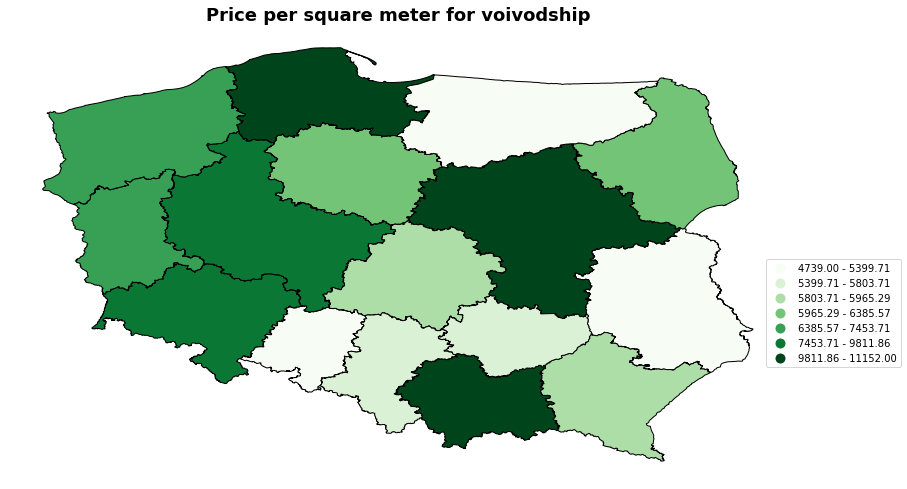

In [359]:
import mapclassify

clear = {'JPT_NAZWA_': group_voivo.wojewodztwo,'średnia cena':mean_price_v, 'średnia cena/m2': mean_price2_v}

maps = pd.DataFrame(clear)

 
maps_mer = pd.merge(maps,map_)

map_geo= geopandas.GeoDataFrame(maps_mer, geometry='geometry')


fig, ax = plt.subplots(1, figsize=(14, 14))
map_geo.plot(ax=ax, edgecolor='black', linewidth=1.0, column = 'średnia cena/m2',
               cmap='Greens',legend=True, scheme='quantiles', k=7)



## Adjust legend location

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))





ax.set_title('Price per square meter for voivodship',fontsize = 18, fontweight = 'bold')


ax.set_axis_off()




(13.621739949250054, 24.646927985750057, 48.710328010550036, 55.12813517445003)

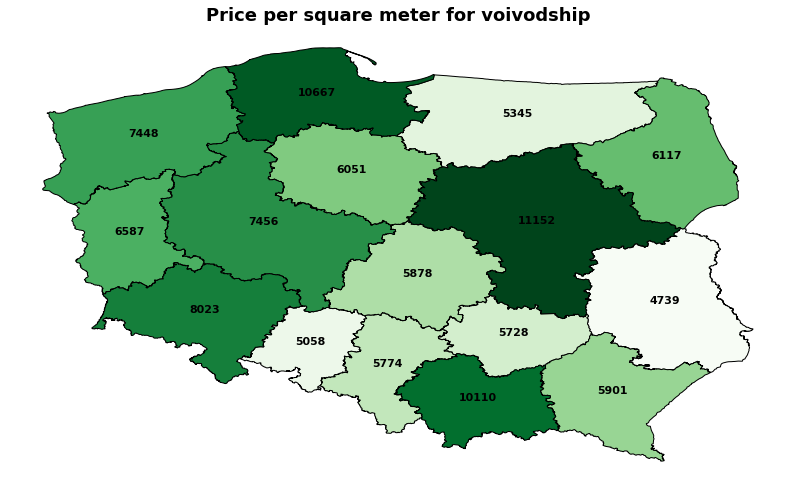

In [404]:
map_geo1 = map_geo

map_geo1 = map_geo1.dissolve(by='średnia cena/m2')
map_geo1.index = map_geo1.index.astype(int)
map_geo1['centroid'] = map_geo1['geometry'].centroid



fig, ax = plt.subplots(1, figsize=(14, 14))
map_geo1.plot(ax=ax, edgecolor='black', linewidth=1.0,
               cmap='Greens',legend=True, scheme='quantiles', k=7)
props = dict(pad = 10 ,edgecolor = 'none', facecolor='none', alpha=5)
for point in map_geo1.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontweight = 'bold',
            fontsize=11,
            bbox=props)

## Adjust legend location

leg = ax.get_legend()
#leg.set_bbox_to_anchor((1.15,0.5))    

ax.set_title('Price per square meter for voivodship',fontsize = 18, fontweight = 'bold')

ax.axis('off')
